In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
from imblearn.over_sampling import RandomOverSampler
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings("ignore")

In [5]:
df=pd.read_csv("data.csv")
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


# understanding tha data
* id: Unique ID for the customer
* Gender: Gender of the customer
* Age: Age of the customer
* Driving_License: [0 : Customer does not have DL, 1 : Customer already has DL]
* Region_Code: Unique code for the region of the customer
* Previously_Insured: [1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance]
* Vehicle_Age: Age of the Vehicle
* Vehicle_Damage: [1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.]
* Annual_Premium: The amount customer needs to pay as premium in the year
* Policy_Sales_Channel: Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.
* Vintage: Number of Days, Customer has been associated with the company
* Response: [1 : Customer is interested, 0 : Customer is not interested]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [7]:
df.shape

(381109, 12)

In [8]:
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [9]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [10]:
df["Response"].value_counts()

Response
0    334399
1     46710
Name: count, dtype: int64

Text(0, 0.5, 'Count')

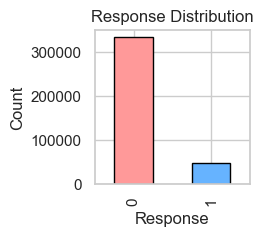

In [11]:
#know about the response distribution
response_counts=df["Response"].value_counts()

plt.figure(figsize=(2,2))

response_counts.plot(kind='bar', color=['#FF9999', '#66B3FF'], edgecolor='black')

plt.title("Response Distribution")
plt.xlabel("Response")
plt.ylabel("Count")

<Axes: >

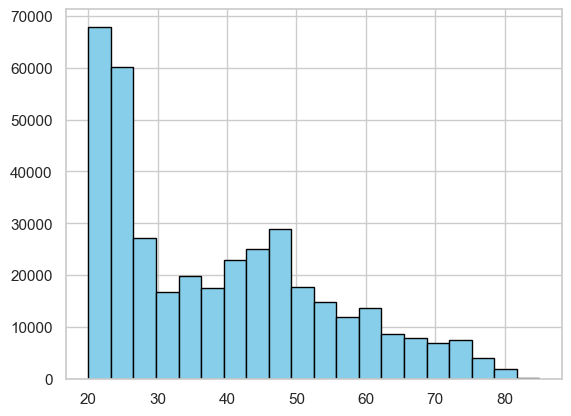

In [12]:
#know anout the age distribution 
df["Age"].hist(bins=20, color='skyblue', edgecolor='black')

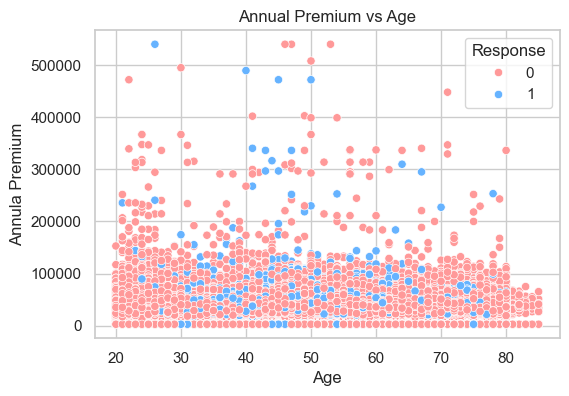

In [14]:
#scatter plot of premium vs age
plt.figure(figsize=(6,4))
sns.scatterplot(data=df,x='Age',y='Annual_Premium', hue='Response', palette=['#FF9999', '#66B3FF'])
plt.title("Annual Premium vs Age")
plt.xlabel('Age')
plt.ylabel('Annula Premium')
plt.show()